Correlation:  -0.005219711383220027
Correlation:  0.02369042507320444
Correlation:  0.04735993943504083


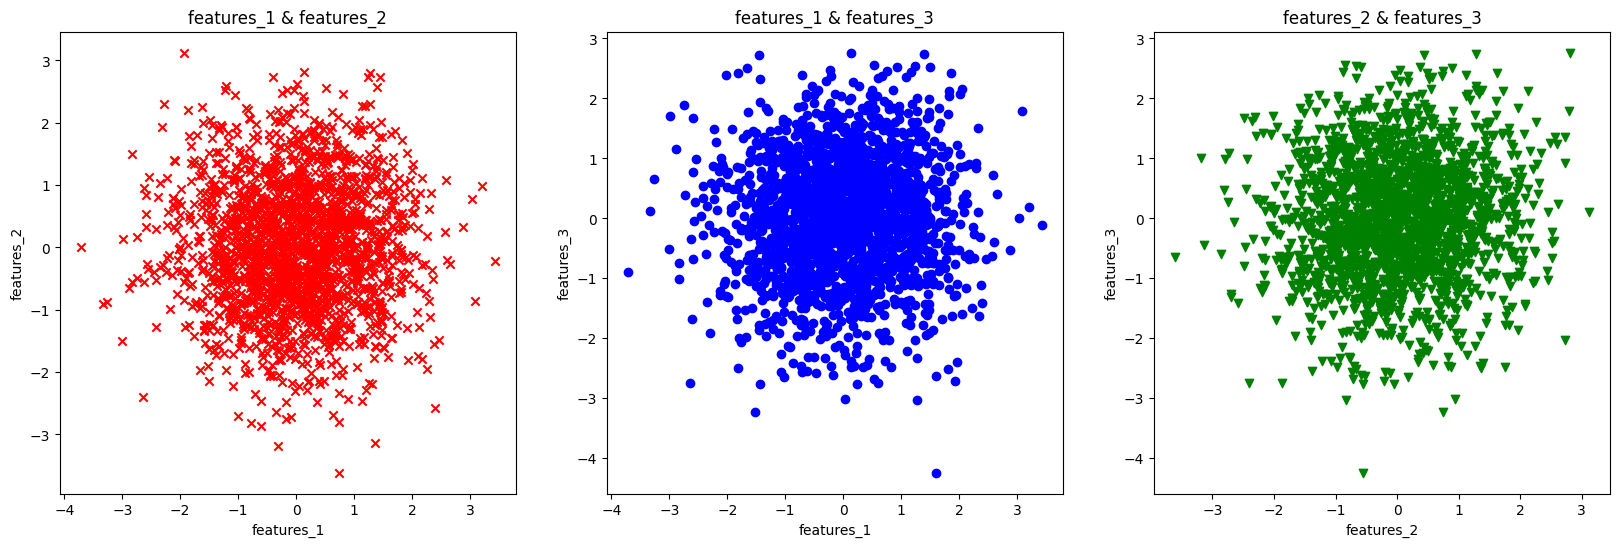

In [15]:
#1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'C:\\Users\\dell\\Desktop\\data\\regression_generated.csv'
df = pd.read_csv(file_name)
data_pairs = []
column_N = ['features_1','features_2','features_3']

#scatter plotRED
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
ax1.scatter(x=df[column_N[0]], y=df[column_N[1]], marker='x', c='r')
ax1.set_title('features_1 & features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')
#scatter plotBLUE
ax2.scatter(x=df[column_N[0]], y=df[column_N[2]], marker='o', c='b')
ax2.set_title('features_1 & features_3')
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')
#scatterplotGREEN
ax3.scatter(x=df[column_N[1]], y=df[column_N[2]], marker='v', c='g')
ax3.set_title('features_2 & features_3')
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')

C1 = np.corrcoef(df[column_N[0]], df[column_N[1]])[0,1]
C2 = np.corrcoef(df[column_N[0]], df[column_N[2]])[0,1]
C3 = np.corrcoef(df[column_N[1]], df[column_N[2]])[0,1]

print("Correlation: ", C1)
print("Correlation: ", C2)
print("Correlation: ", C3)


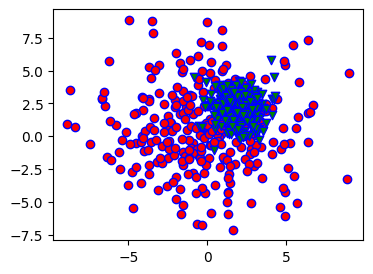

In [18]:
#2
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

import numpy as np
import matplotlib.pyplot as plt

def create_2Dgaussian(mu1, mu2, sigma1, sigma2, size):
    x1 = np.random.normal(loc=mu1, scale=sigma1, size=size)
    y1 = np.random.normal(loc=mu1, scale=sigma1, size=size)
    x2 = np.random.normal(loc=mu2, scale=sigma2, size=size)
    y2 = np.random.normal(loc=mu2, scale=sigma2, size=size)
    return ((x1, y1),(x2, y2))
dataset = create_2Dgaussian(0, 2, 3, 1, 300)
#scatter plot
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(dataset[0][0], dataset[0][1], marker='o', c='r', edgecolor='b')
ax.scatter(dataset[1][0], dataset[1][1], marker='v', c='g', edgecolor='b')

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


Text(0, 0.5, 'Residuals')

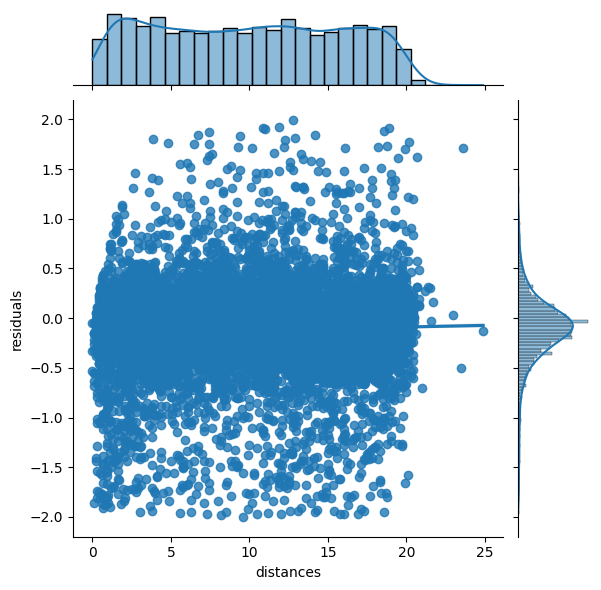

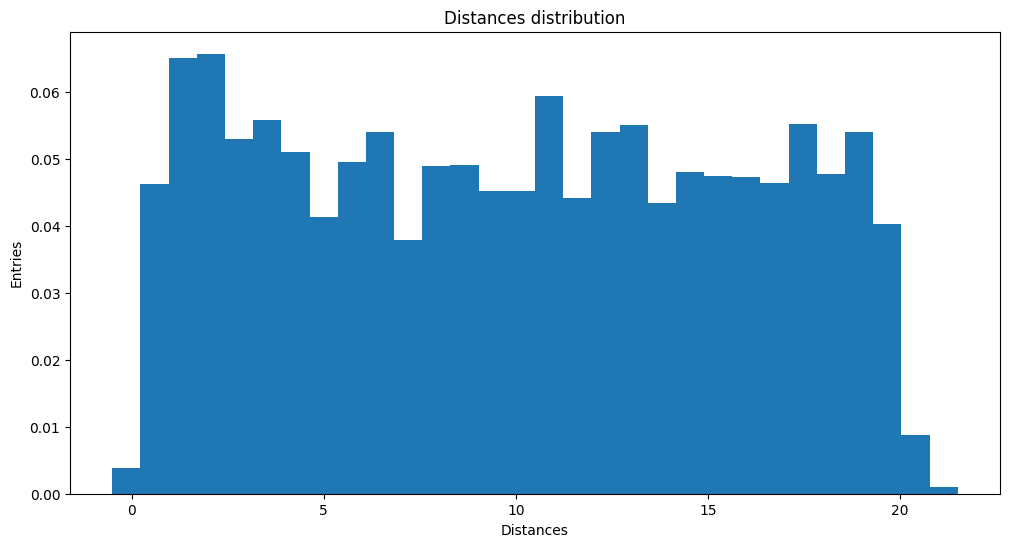

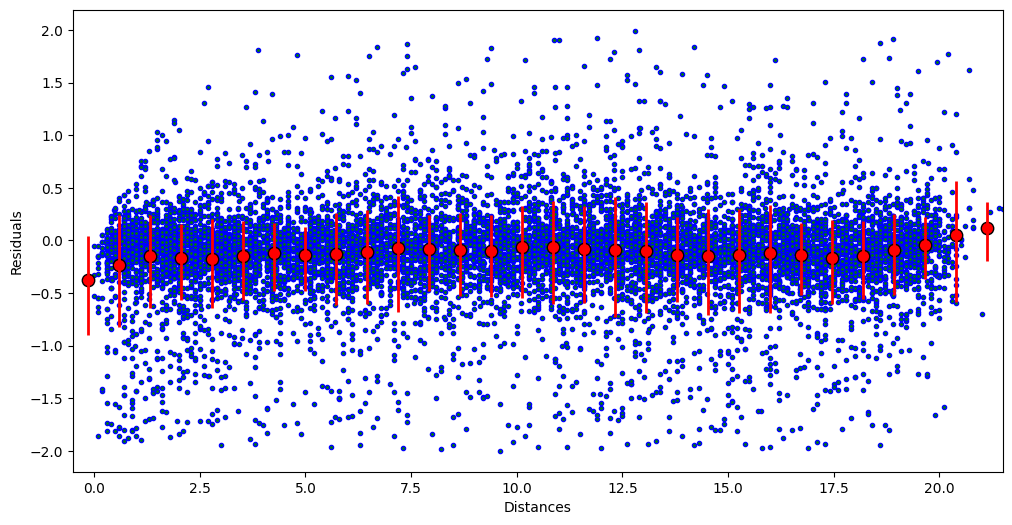

In [6]:
#3
import pickle
import pandas as pd
import numpy as np
from matplotlib import collections  as mc
import seaborn as sns
import matplotlib.pyplot as plt

#Inspect the dataset
with open('C:\\Users\\dell\\Desktop\\data\\residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
    print(data)

#Convert the content to a Pandas Dataframe
mydict = data[()]
df = pd.DataFrame(mydict)
print(df)

#Clean the sample
clean_df = df[abs(df['residuals'])<2]
print(clean_df)

#Plot
g = sns.jointplot(x="distances", y="residuals", data=clean_df, kind='reg')

#Profile histogram for the "distance" variable
dist = list(clean_df['distances'])
fig, ax = plt.subplots(figsize=(12, 6))
h, bins, _ = plt.hist(dist, bins=30, range=(-0.5, 21.5), density=True, cumulative=False)
ax.set_title('Distances distribution')
ax.set_xlabel('Distances')
ax.set_ylabel('Entries')
bin_ranges = list(zip(bins,bins[1:]))

#Computing centers of bins
centers = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]

#Computing means and variances of residuals in each bin
means = np.empty(len(bin_ranges))
variances = np.empty(len(bin_ranges))
for bin_index, interval in enumerate(bin_ranges):
    residuals=[]
    for index, row in clean_df.iterrows():
        if (interval[0]<row['distances']) and (row['distances']<interval[1]):
            residuals.append(row['residuals'])
    if len(residuals)==0:
        np.append(means, np.nan)
        np.append(variances, np.nan)
    else:
        means[bin_index] = sum(residuals)/len(residuals)
        variances[bin_index] = np.var(residuals)

#Plot the dataframe points with means and variances
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(clean_df['distances'], clean_df['residuals'], marker='.', c='g', edgecolor='b')
ax.scatter(centers, means, marker='o', c='r', edgecolor='k', s=80)

lines = [[(x[0], x[1]-2.5*x[2]), (x[0], x[1]+2*x[2])] for x in zip(centers,means, variances)]
lc = mc.LineCollection(lines, colors='r', linewidths=2)
ax.add_collection(lc)
plt.gca().set_xlim(left=-0.5, right=21.5)
ax.set_xlabel('Distances')
ax.set_ylabel('Residuals')

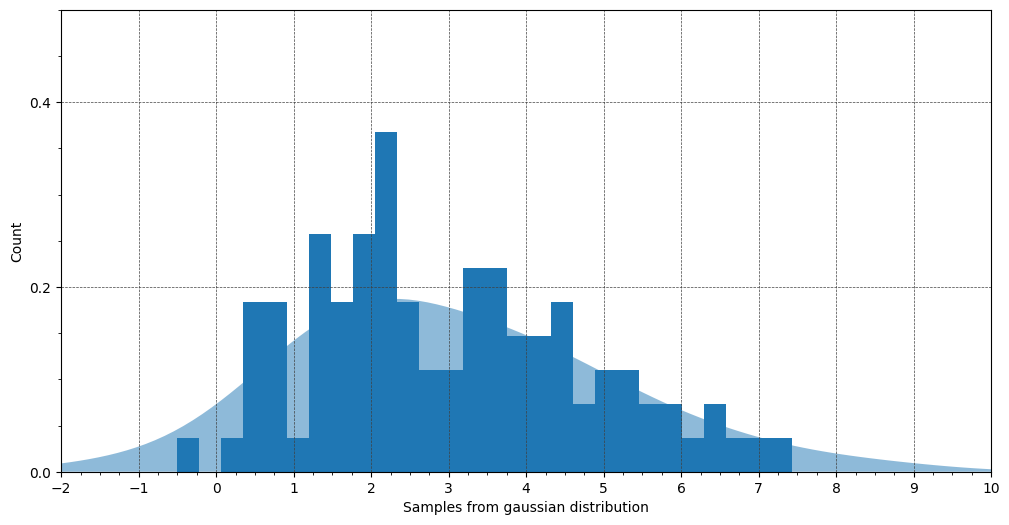

In [5]:
#4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

x = np.random.normal(loc=3, scale=2, size=100)


fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax.set_xlabel("Samples from gaussian distribution")
ax.set_ylabel("Count")
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(0.20))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.axis([-2, 10, 0, 0.5])

#Plot the histogram
h, bins, _ = plt.hist(x, bins=30, range=(-0.5, 8), density=True, cumulative=False)

#Plot the KDE
x_d = np.linspace(-2, 10, 100)
gaussians = [norm(xi).pdf(x_d) for xi in x]
gaussians_sum = sum(gaussians)
density = gaussians_sum / np.trapz(gaussians_sum, x_d)
plt.fill_between(x_d, density, alpha=0.5)